In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import f1_score, accuracy_score
from scipy.fftpack import fft
import time
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.pyplot import savefig

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda")

In [777]:
def generate800samples(input_ndarray):
    x=torch.from_numpy(input_ndarray[0:1024]).squeeze()
    for i in range(1,800):
        x_new=torch.from_numpy(input_ndarray[i*12:(i*12+1024)]).squeeze()
        x=torch.cat((x,x_new),0)
    x=x.reshape(-1,1024)
    #print(np.shape(x))
    return x#注意这里要有返回值

In [778]:
#制作数据集HP=0-3 make data set HP=0-3
m0 = loadmat("../data/CWRU/Normal_Data/97.mat")#HP=0 正常情况，读取后是dict格式
#12k驱动端轴承采集信号（不是轴承的驱动端，是驱动端轴承）12k_Drive_End_Data
m1 = loadmat("../data/CWRU/12k_Drive_End_Data/108.mat")#HP=3，7，inner
m2 = loadmat("../data/CWRU/12k_Drive_End_Data/121.mat")#HP=3，7，ball
m3 = loadmat("../data/CWRU/12k_Drive_End_Data/133.mat")#HP=3，7，outer6
m4 = loadmat("../data/CWRU/12k_Drive_End_Data/171.mat")#HP=2，14，inner
m5 = loadmat("../data/CWRU/12k_Drive_End_Data/187.mat")#HP=2，14，ball
m6 = loadmat("../data/CWRU/12k_Drive_End_Data/199.mat")#HP=2，14，outer6
m7 = loadmat("../data/CWRU/12k_Drive_End_Data/210.mat")#HP=1，21，inner
m8 = loadmat("../data/CWRU/12k_Drive_End_Data/223.mat")#HP=1，21，ball
m9 = loadmat("../data/CWRU/12k_Drive_End_Data/247.mat")#HP=1，21，outer3
#12k风扇端轴承采集信号 12k_Fan_End_Data
m10 = loadmat("../data/CWRU/12k_Fan_End_Data/281.mat")#HP=3，7，inner
m11 = loadmat("../data/CWRU/12k_Fan_End_Data/285.mat")#HP=3，7，ball
m12 = loadmat("../data/CWRU/12k_Fan_End_Data/297.mat")#HP=3，7，outer6
m13 = loadmat("../data/CWRU/12k_Fan_End_Data/276.mat")#HP=2，14，inner
m14 = loadmat("../data/CWRU/12k_Fan_End_Data/288.mat")#HP=2，14，ball
m15 = loadmat("../data/CWRU/12k_Fan_End_Data/311.mat")#HP=2，14，outer3
m16 = loadmat("../data/CWRU/12k_Fan_End_Data/271.mat")#HP=1，21，inner
m17 = loadmat("../data/CWRU/12k_Fan_End_Data/291.mat")#HP=1，21，ball
m18 = loadmat("../data/CWRU/12k_Fan_End_Data/316.mat")#HP=1，21，outer3

y0 = torch.from_numpy(m0['X097_DE_time'][:4096 * 25]).squeeze()
y1 = torch.from_numpy(m1['X108_DE_time'][:4096 * 25]).squeeze()
y2 = torch.from_numpy(m2['X121_DE_time'][:4096 * 25]).squeeze()
y3 = torch.from_numpy(m3['X133_DE_time'][:4096 * 25]).squeeze()
y4 = torch.from_numpy(m4['X171_DE_time'][:4096 * 25]).squeeze()
y5 = torch.from_numpy(m5['X187_DE_time'][:4096 * 25]).squeeze()
y6 = torch.from_numpy(m6['X199_DE_time'][:4096 * 25]).squeeze()
y7 = torch.from_numpy(m7['X210_DE_time'][:4096 * 25]).squeeze()
y8 = torch.from_numpy(m8['X223_DE_time'][:4096 * 25]).squeeze()
y9 = torch.from_numpy(m9['X247_DE_time'][:4096 * 25]).squeeze()

y10 = torch.from_numpy(m10['X281_DE_time'][:4096 * 25]).squeeze()
y11 = torch.from_numpy(m11['X285_DE_time'][:4096 * 25]).squeeze()
y12 = torch.from_numpy(m12['X297_DE_time'][:4096 * 25]).squeeze()
y13 = torch.from_numpy(m13['X276_DE_time'][:4096 * 25]).squeeze()
y14 = torch.from_numpy(m14['X288_DE_time'][:4096 * 25]).squeeze()
y15 = torch.from_numpy(m15['X311_DE_time'][:4096 * 25]).squeeze()
y16 = torch.from_numpy(m16['X271_DE_time'][:4096 * 25]).squeeze()
y17 = torch.from_numpy(m17['X291_DE_time'][:4096 * 25]).squeeze()
y18 = torch.from_numpy(m18['X316_DE_time'][:4096 * 25]).squeeze()

y0 = generate800samples(m0['X097_DE_time'])
y1 = generate800samples(m1['X108_DE_time'])
y2 = generate800samples(m2['X121_DE_time'])
y3 = generate800samples(m3['X133_DE_time'])
y4 = generate800samples(m4['X171_DE_time'])
y5 = generate800samples(m5['X187_DE_time'])
y6 = generate800samples(m6['X199_DE_time'])
y7 = generate800samples(m7['X210_DE_time'])
y8 = generate800samples(m8['X223_DE_time'])
y9 = generate800samples(m9['X247_DE_time'])
y10 = generate800samples(m10['X281_DE_time'])
y11 = generate800samples(m11['X285_DE_time'])
y12 = generate800samples(m12['X297_DE_time'])
y13 = generate800samples(m13['X276_DE_time'])
y14 = generate800samples(m14['X288_DE_time'])
y15 = generate800samples(m15['X311_DE_time'])
y16 = generate800samples(m16['X271_DE_time'])
y17 = generate800samples(m17['X291_DE_time'])
y18 = generate800samples(m18['X316_DE_time'])
print(np.shape(y0))
print(y0)

torch.Size([800, 1024])
tensor([[ 0.0532,  0.0887,  0.0997,  ...,  0.1045,  0.1519,  0.1602],
        [ 0.0459,  0.0922,  0.0918,  ...,  0.0989,  0.1239,  0.1091],
        [ 0.0050,  0.0286,  0.0438,  ...,  0.0607,  0.0868,  0.0716],
        ...,
        [ 0.0063,  0.0127,  0.0248,  ..., -0.1179, -0.0296,  0.0334],
        [-0.0167, -0.0058,  0.0340,  ..., -0.0519,  0.0234,  0.0741],
        [ 0.0083,  0.0313,  0.0618,  ...,  0.0461,  0.0780,  0.1033]],
       dtype=torch.float64)


In [779]:
#FFT+BN
def FFT_BN_transpose(input_data):
    X_len=np.shape(input_data)[0]
    X=np.empty(shape=[X_len,1024])#X作为中间变量起到容器作用
    for i in range(X_len):
        Y=fft(input_data[i])
        input_data[i]=np.abs(Y)
        input_data[i]=(input_data[i]/X_len)
        X[i]=input_data[i][:1024]
    X = preprocessing.scale(X)
    print('output_data.shape:',np.shape(X))
    return X

In [780]:
def gen_gaussian_noise(signal,SNR):
    """
    :param signal: 原始信号 original signal
    :param SNR: 添加噪声的信噪比 signal noise ratio
    :return: 生成的噪声 the generated noise 
    """
    #print('the shape of original signal',np.shape(signal))
    noise=np.random.randn(*signal.shape) # *signal.shape 获取样本序列的尺寸
    noise=noise-np.mean(noise)
    signal_power=(1/signal.shape[0])*np.sum(np.power(signal,2))
    noise_variance=signal_power/np.power(10,(SNR/10))
    noise=(np.sqrt(noise_variance)/np.std(noise))*noise
    #print('the shape of noise',np.shape(noise))
    return noise

In [781]:
train_data = torch.stack((y0, y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18), 0)
train_data = train_data.reshape(-1, 2048).type(torch.FloatTensor)#(8000, 2048)必须是2048后面才能进入FFT
train_data = train_data.numpy()
print('All_data.shape before FFT:',np.shape(train_data))#(8000, 2048)
L1 = torch.zeros(400)
L2 = torch.ones(400)
L3 = L2.add(1)
L4 = L3.add(1)
L5 = L4.add(1)
L6 = L5.add(1)
L7 = L6.add(1)
L8 = L7.add(1)
L9 = L8.add(1)
L10 = L9.add(1)
labels = torch.cat((L1, L1, L2, L3, L4, L5, L6, L7, L8, L9, L10, L2, L3, L4, L5, L6, L7, L8, L9, L10), 0)
labels = labels.numpy()
x_train_beforeFFT, x_test_beforeFFT, y_train, y_test = train_test_split(train_data, labels, test_size=0.4)


All_data.shape before FFT: (8000, 2048)


In [782]:
# #part of the train data is added with noise
SNR=3#-3,-2,-1,0,1,2,3
number_of_train_data_with_noise=1920#0,480,960,1920

for i in range(number_of_train_data_with_noise): 
    x_train_beforeFFT[i]=x_train_beforeFFT[i]+gen_gaussian_noise(x_train_beforeFFT[i],SNR)#注意传播性broadcast
x_train=FFT_BN_transpose(x_train_beforeFFT)
# print('x_train.shape:',np.shape(x_train))
# print('x_test_beforeFFT:',np.shape(x_test_beforeFFT))

output_data.shape: (4800, 1024)


In [783]:

x_train = torch.from_numpy(x_train).type(torch.FloatTensor).to(device)#先划分数据集，训练集训练模型，测试集加上白噪声，再预处理，进入刚才训练好的模型检验精度
y_train = torch.from_numpy(y_train).type(torch.FloatTensor).to(device)
dataset = Data.TensorDataset(x_train, y_train)
print('x_train.shape:',np.shape(x_train))

x_train.shape: torch.Size([4800, 1024])


In [784]:
#观察随机一个初始测试信号 observe an original signal
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']#这个title可以加上中文
mpl.rcParams['axes.unicode_minus'] = False

num=[]
for i in range(2048):
    num.append(i)

num1=[]
for i in range(1024):
    num1.append(i)

In [785]:
# NoiseNo=15 #The number of observed data
# pl.title('original data')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num, list(train_data[NoiseNo]), 'r-')
# print(np.shape(train_data[NoiseNo]))
# savefig("original data.png", dpi=400,bbox_inches = 'tight')#先保存再显示，否则会被清零
# pl.show()

In [786]:
# noise= gen_gaussian_noise(train_data[NoiseNo],SNR)
# pl.title('noise for raw data')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num, noise, 'r-')
# savefig("noise for raw data.png", dpi=400,bbox_inches = 'tight')
# pl.show()

In [787]:
def check_snr(signal,noise):
    """
    :param signal: 原始信号
    :param noise: 生成的高斯噪声
    :return: 返回两者的信噪比
    """
    signal_power=(1/signal.shape[0])*np.sum(np.power(signal,2))# 0.5722037
    noise_power=(1/noise.shape[0])*np.sum(np.power(noise,2)) # 0.90688
    SNR=10*np.log10(signal_power/noise_power)
    return SNR

Checked_SNR= check_snr(train_data[NoiseNo],noise)
print ('SNR',Checked_SNR)

SNR -2.999999999999999


In [788]:
# train_data_with_noise=train_data[NoiseNo]+noise
# pl.title('data with noise')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num, train_data_with_noise, 'r-')
# savefig("data with noise.png", dpi=400,bbox_inches = 'tight')
# pl.show()

In [789]:
# pl.title('data after FFT')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num1, list(x_train[NoiseNo]), 'r-')
# #savefig("经过FFT变换后的数据.png", dpi=400,bbox_inches = 'tight')
# plt.savefig("data after FFT.png", dpi=400,bbox_inches = 'tight')
# pl.show()

In [790]:
#修改所有X_test加入了噪音数据,并进行FFT  Test data set is added with noise
x_test_noisy_signal=np.empty(shape=np.shape(x_test_beforeFFT))

for i in range(len(x_test_beforeFFT)):    
    x_test_noisy_signal[i]=x_test_beforeFFT[i]+gen_gaussian_noise(x_test_beforeFFT[i],SNR)#注意传播性broadcast
x_test_with_noisy=FFT_BN_transpose(x_test_noisy_signal)
x_test=FFT_BN_transpose(x_test_beforeFFT)
print('x_test.shape:',np.shape(x_test))
print('x_test_with_noisy.shape:',np.shape(x_test_with_noisy))
#x_test = torch.from_numpy(x_test).type(torch.FloatTensor).to(device)#test data without SNR
x_test = torch.from_numpy(x_test_with_noisy).type(torch.FloatTensor).to(device)#test data with SNR

output_data.shape: (3200, 1024)
output_data.shape: (3200, 1024)
x_test.shape: (3200, 1024)
x_test_with_noisy.shape: (3200, 1024)


In [791]:
# pl.title('original test data FFT')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num, list(x_test_beforeFFT[NoiseNo]), 'r-')
# savefig("x_test_beforeFFT.png", dpi=400,bbox_inches = 'tight')#先保存再显示，否则会被清零
# pl.show()

# pl.title('data with noise FFT')
# plt.xlabel('Sampling points')
# plt.ylabel('Amplitude/mm')
# pl.plot(num1, x_test_with_noisy[NoiseNo], 'r-')
# savefig("x_test_with_noisy_FFT.png", dpi=400,bbox_inches = 'tight')
# pl.show()

In [792]:
x_test_beforeFFT.shape

(3200, 2048)

Epoch[1,5] Loss:0.181875
SVM fit-score = 1.0
Epoch[2,5] Loss:0.081432
SVM fit-score = 1.0
Epoch[3,5] Loss:0.043927
SVM fit-score = 1.0
Epoch[4,5] Loss:0.018910
SVM fit-score = 1.0
Epoch[5,5] Loss:0.016748
SVM fit-score = 1.0


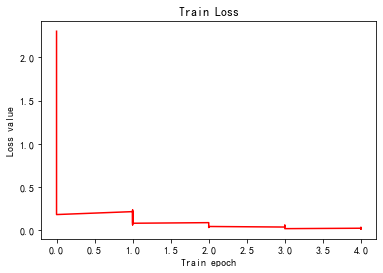

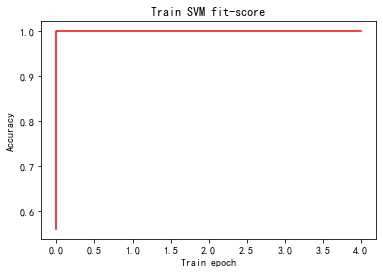

Test Accuracy = 0.9996875
Time cost = 81.37262177467346


In [793]:
#线性神经网络分类 Fully connected network classification
start = time.time()
EPOCH = 5
BATCH_SIZE = 64
LR = 0.001
Loss_num = []
Loss_list = []
Acc_list=[]
train_loader = Data.DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)#step1 data
# Hyper Parameters

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(

            nn.Linear(1024, 10),
    )

    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

autoencoder = AutoEncoder().to(device) #step2 Model
autoencoder.train(mode=True)
# loss_func1 = nn.MSELoss()
loss_func1 = nn.CrossEntropyLoss()#step3 Loss
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay=1e-5) #step4 optimizer

for epoch in range(EPOCH):  # train
    for step,(x,y) in enumerate(train_loader):
        b_x = x.view(-1, 1, 1024).to(device)  # batch x, shape (batch, 1024)
        b_y = x.view(-1, 1024).to(device)  # batch y, shape (batch, 1024)

        encoded = autoencoder(b_x)
        loss1 = loss_func1(encoded.reshape(-1,10),y.long())  # mean square error

        optimizer.zero_grad()  # clear gradients for this training step
        loss1.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        Loss_list.append(loss1.item())
        Loss_num.append(epoch)
        
        # 准确率
        encoded_data = autoencoder(x_train.view(-1, 1, 1024))
        encoded_data = encoded_data.cpu().detach().numpy()
        # clf = SVC(C=8.94, gamma=3.26)
        clf = SVC(C=10.23, kernel='rbf', gamma=0.001, decision_function_shape='ovr')#rbf高斯基核函数
        clf.fit(encoded_data.reshape(-1, 10), y_train.cpu().numpy())
        fit_score = clf.score(encoded_data.reshape(-1 ,10), y_train.cpu().numpy())
        Acc_list.append(fit_score)
        
    showLossnIterval = 1
    if epoch%showLossnIterval == 0:    
        print('Epoch[%d,%d] Loss:%f' % (epoch + showLossnIterval, EPOCH, loss1.item()))
        print('SVM fit-score = ' + str(fit_score))

pl.title('Train Loss')
plt.xlabel('Train epoch')
plt.ylabel('Loss value')
pl.plot(Loss_num, Loss_list, 'r-')
savefig("Train Loss.png", dpi=400,bbox_inches = 'tight')#先保存图片再显示
pl.show()

pl.title('Train SVM fit-score')
plt.xlabel('Train epoch')
plt.ylabel('Accuracy')
pl.plot(Loss_num, Acc_list, 'r-')
savefig("Train SVM fit-score.png", dpi=400,bbox_inches = 'tight')
pl.show()
autoencoder.eval()  # Test

encoded_data = autoencoder(x_test.view(-1, 1, 1024))
encoded_data = encoded_data.detach().numpy()
pred_y = clf.predict(encoded_data.reshape(-1, 10))
accuracy = sum(pred_y == y_test) / len(x_test)
print('Test Accuracy = ' + str(accuracy))

end = time.time()
print('Time cost = ' + str(end - start))

In [794]:
# #画SNR--ACC的图像

# SNR=[-3,-2,-1,0,1,2,3]
# ACC=[0.971,0.981,0.994,0.993,0.989,0.995,0.997]
# pl.plot(SNR, ACC, 'r-')
# # figsize：创建图表窗口，设置窗口大小
# # 创建图表对象，并赋值与fig

# #plt.title('Accuracy under different SNR')  # 图名
# plt.xlabel('SNR/dB')  # x轴标签
# plt.ylabel('Accuracy') # y轴标签

# plt.legend(loc = 'upper right')
# savefig("Accuracy under different SNR.png", dpi=400,bbox_inches = 'tight')
# pl.show()
# #plt.xlim([0,12])  # x轴边界
# #plt.ylim([0,1.5])  # y轴边界
# #plt.xticks(range(10))  # 设置x刻度,与下面工作重复，分成10段
# #plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])  # 设置y刻度
# # 范围只限定图表的长度，刻度则是决定显示的标尺 → 这里x轴范围是0-12，但刻度只是0-9，刻度标签使得其显示1位小数
# # 轴标签则是显示刻度的标签

In [795]:
from evaluation import *
import pandas as pd
CLASSES = [chr(65 + i_) for i_ in range(10)]
evals = Evaluations(pred_y, y_test,CLASSES)

precision_ = evals.average.precision()
recall_ = evals.average.recall()

print(evals)


**************************************************************************************************************************************************************************************************************************************
                |Aveg|    |A|     |B|     |C|     |D|     |E|     |F|     |G|     |H|     |I|     |J|     
precision: 	0.9997  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  0.9966  1.0000  1.0000 
recall: 	0.9997  1.0000  1.0000  1.0000  0.9968  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000 
accuracy: 	0.9999  1.0000  1.0000  1.0000  0.9997  1.0000  1.0000  1.0000  0.9997  1.0000  1.0000 
f1_score: 	0.9997  1.0000  1.0000  1.0000  0.9984  1.0000  1.0000  1.0000  0.9983  1.0000  1.0000 
**************************************************************************************************************************************************************************************************************************************


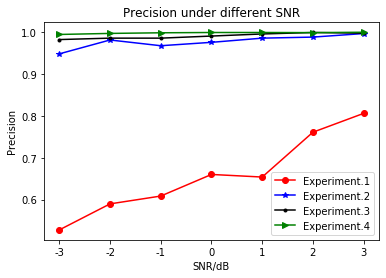

In [3]:
import matplotlib.pyplot as plt

x_data = ['-3','-2','-1','0','1','2','3']
y_data1 = [0.5275,0.5897,0.6084,0.6600,0.6538,0.7609,0.8059]
y_data2 = [0.9481,0.9812,0.9675,0.9756,0.9856,0.9881,0.9966]
y_data3 = [0.9822,0.9856,0.9856,0.9906,0.9956,0.9991,0.9975]
y_data4 = [0.9944,0.9969,0.9984,0.9991,0.9991,0.9988,0.9997]

ln1, = plt.plot(x_data,y_data1,color='red',marker='o')
ln2, = plt.plot(x_data,y_data2,color='blue',marker='*')
ln3, = plt.plot(x_data,y_data3,color='black',marker='.')
ln4, = plt.plot(x_data,y_data4,color='green',marker='>')

plt.legend(handles=[ln1,ln2,ln3,ln4],labels=['Experiment.1','Experiment.2','Experiment.3','Experiment.4'],
           loc = 0)

plt.title('Precision under different SNR')  # 图名
plt.xlabel('SNR/dB')  # x轴标签
plt.ylabel('Precision') # y轴标签

savefig("Precision under different SNR.png", dpi=400,bbox_inches = 'tight')

plt.show()